In [ ]:
%pip install transformers numpy scikit-learn torch matplotlib

In [5]:
from transformers import BertTokenizer, BertModel
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [12]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [8]:
sentences = [
    "I had pizza and pasta",
    "I ate dunner",
    "We had a three-course meal",
    "Brad came to dinner with us",
    "He loves fish tacos",
    "In the end we all felt like we ate too much",
    "We all agreed that it was a magnificent evening",
    "eminerals are beautiful",
    "diamonds are pretty",
    "minerals are not good",
]

In [10]:
embeddings = []

for sent in sentences:
    encoded = tokenizer.encode_plus(sent, return_tensors="pt")
    output = model(**encoded)
    embedding = output.last_hidden_state[:, 0, :].detach().numpy()
    embeddings.append(embedding)

embeddings = np.array(embeddings)

embeddings = np.reshape(embeddings, (embeddings.shape[0], -1))
embeddings = embeddings.astype(np.float64)

pca = PCA(n_components=2)
projected = pca.fit_transform(embeddings)

embeddings

array([[-0.24542767, -0.19530573, -0.22431171, ...,  0.08649837,
         0.45450994,  0.22828649],
       [-0.18676117,  0.4032084 , -0.21183348, ...,  0.00074164,
         0.54283726,  0.51507062],
       [ 0.07199771, -0.03965198, -0.23854697, ..., -0.11319853,
         0.657184  ,  0.20062713],
       ...,
       [-0.24521671,  0.34260583, -0.17083713, ..., -0.23082307,
         0.38826147,  0.32969281],
       [ 0.06720316,  0.1260083 , -0.16467243, ..., -0.19638284,
         0.01868125,  0.06435171],
       [-0.35878116,  0.38111225, -0.08421387, ..., -0.6245594 ,
         0.36433437,  0.25386131]])

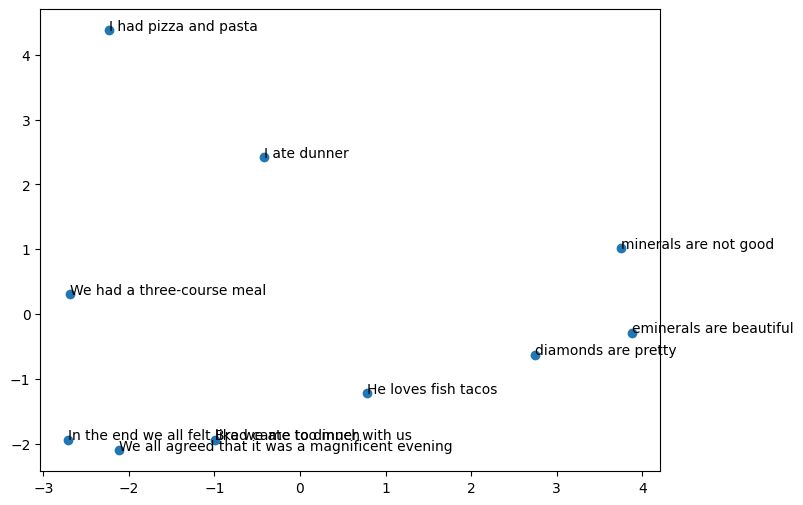

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(projected[:, 0], projected[:, 1])
for i, sent in enumerate(sentences):
    plt.annotate(sent, (projected[i, 0], projected[i, 1]))
    
plt.show()